In [1]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study: Iris Dataset </u></b></h2>

<h3><b><i>Background</i></b></h3>
Irises come in many different colors, shapes, and varieties. Over 300 individual species are part of the Iris genus [1]. In 1936, R.A. Fisher collected measurements on 4 different plant attributes, from 3 different iris species, creating a dataset known as the Iris dataset [2]. 

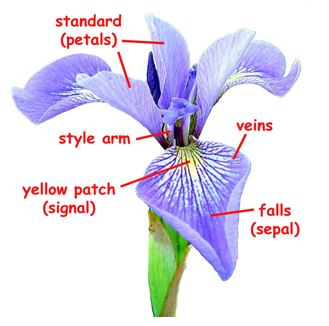


The four measurements in the Iris dataset are: the sepal length, sepal width, petal length, and petal width. These are shown in the above image [3]. The three species of irises in the datset are: setosa, versicolor, and virginica, which are shown in order in the images [4],[5],[6] below.

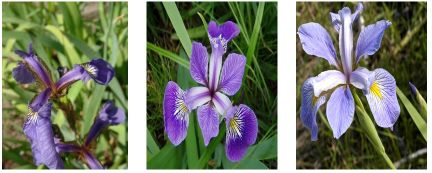

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to practice creating visualizations using the Matplotlib library. The content of this Case Study is similar to what you've learned in DataCamp's <a href = "https://learn.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib" >Introduction to Data Visualization with Matplotlib</a> and in DASC 2113 lecture. 

<h3><b>Data</b></h3>
The data used in this Case Study is the Iris dataset discussed above. The Iris dataset will be imported directly from the scikit-learn library. 

Sources: 
<ol style = "font-size:8px">
    <li>Boeckmann, Catherine. 2021. The. Old Farmers Almanac. https://www.almanac.com/plant/irises</li>
    <li>Dua, D. and Graff, C. 2019. "Iris Dataset". UCI Machine Learning Repository.  Irvine, CA: University of California, School of Information and Computer Science.[http://archive.ics.uci.edu/ml].</li>
    <li>Conrad, Jim. "Parts of Iris Flower". Backyard Nature. Image. The Iris Flower. USDA & US Forest Service. https://www.fs.fed.us/wildflowers/beauty/iris/flower.shtml. 
    <li>Wikipedia. 2015. "Kosaciec_szczecinkowaty_Iris_setosa.jpg". Image.  https://commons.wikimedia.org/wiki/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg.</li>
    <li>Langlois, Danielle. 2005. "Blue flag flower close-up (Iris versicolor)". Wikipedia. Image.  https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_versicolor_3.jpg.</li>
    <li>Mayfield, Frank. 2007. "image of Iris virginica shrevei BLUE FLAG at the James Woodworth Prairie Preserve - a bud and a single flower at full bloom". Wikipedia. Image. https://en.wikipedia.org/wiki/Iris_flower_data_set#/media/File:Iris_virginica.jpg</li>

</ol>

<h4><b>Importing Libraries</b></h4>

Import Matplotlib's pyplot, NumPy, Pandas, and the <b><i>Iris dataset</i></b> from scikit-learn. 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets

<h4><b>Loading the Data</b></h4>

The <b><i>Iris dataset</i></b> can be loaded directly from scikit-learn's datasets. The result of loading the <b><i>Iris</i></b> data this way is an <b><i>scikit-learn Bunch</i></b> object. 

In [3]:
iris_data = datasets.load_iris()
print(type(iris_data))

<class 'sklearn.utils._bunch.Bunch'>


<h4><b>Formatting the Data for Use</b></h4>

A <b><i>Bunch </i></b> object extends the capabilities of a Python Dictionary <a href = "https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html">(scikitlearn, 2020)</a>. The <b><i>Iris dataset</i></b> contains multiple different key/values, however only two are needed for this Case Study, <i>data</i> and <i>target_names</i>. <i>Data</i> contains the four different data measurements (sepal length, sepal width, petal length, petal width). <i>Target_names</i> contains the names of the three iris species used. Let's extract the values of those two keys and store the results as a DataFrame. 

In [4]:
# Get the values returned by "data" and "target_names"
iris_df = pd.DataFrame(iris_data["data"], columns = ["sepal_len", "sepal_w", "petal_len", "petal_w"])
target_names = iris_data["target_names"]

# Print the first 5 rows of iris_df
iris_df.head()
# Print the target_names numpy array
print(target_names)
# Print the info about the DataFrame
iris_df.info()

['setosa' 'versicolor' 'virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sepal_len  150 non-null    float64
 1   sepal_w    150 non-null    float64
 2   petal_len  150 non-null    float64
 3   petal_w    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


The <b><i>iris_df</i></b> DataFrame is almost complete. The last thing that needs to be done is to append the correct species name to the measurement in <b><i>iris_df</i></b> that it corresponds to. The species names stored in <b><i>target_names</i></b> are in the order that the measurements occur. Let's use this along with the fact that each species has <span class="num">50 measurements</span> to append the new column to the DataFrame. 

In [5]:
# Format the target names for use with the iris_df by repeating each name 50 times 
species_names = np.concatenate([np.repeat(target_name, 50) for target_name in target_names])

# Print the shape of species_names
print(species_names.shape)

(150,)


NumPy's <b>repeat</b> function is used to repeat each species name (<i>target_name</i>) <span class="num">50 times</span>. This is done using a list comprehension. This means three separate numpy arrays are returned, each array containing that species name repeated, and each of the three arrays stored in the list. Three seperate arrays stored in a list is not the desired result though. To get one single NumPy array, the three arrays in the list comprehension are <b>concatenated</b> into a single array. 

Now the <b><i>species_names</i></b> array can be used to create the last column needed in <b><i>iris_df</i></b>. 

In [6]:
# Append the new species column 
iris_df["species"] = species_names

# Check that each species has the correct number of values using value_counts. 
iris_df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

To make creating the visualizations a little easier, each iris species will be separated into its own DataFrame. The <b><i>setosa, versicolor, and virginica</i></b> DataFrames will be used for the rest of this Case Study. 

In [7]:
# Seperate iris_df into different views for each species to make plotting easier. 
# Don't append the original index col. to the DataFrame by using drop = True
setosa = iris_df[iris_df["species"] == "setosa"].reset_index(drop = True)
versicolor = iris_df[iris_df["species"] == "versicolor"].reset_index(drop = True)
virginica = iris_df[iris_df["species"] == "virginica"].reset_index(drop = True)

# Display the first 5 rows of the setosa DataFrame. 
setosa.head()

,sepal_len,sepal_w,petal_len,petal_w,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<h4><b>Visualizing Petal Length</b></h4>

In the Code Cell below, let's visualize the length of Iris petals on a single plot. In this Case Study, the visualizations will be created using <a href = "https://matplotlib.org/stable/tutorials/introductory/lifecycle.html">Matplotlib's Object Oriented API</a>. This involves using the Figure (<b><i>fig</i></b>) and Axes (<b><i>axs</i></b>) objects of a plot to create the visualization. You've seen the Object Oriented API used to create the maps in the Week 04 Merging Data with Pandas Case Study. Most of the other Case Studies you've seen so far use the <a href = "https://matplotlib.org/stable/tutorials/introductory/pyplot.html">Pyplot Interface</a> to create visualizations. 

Let's practice using <b><i>MatplotLib's Object Oriented API</i></b> by creating a single plot showing the <i>petal length</i> for each Iris species. 

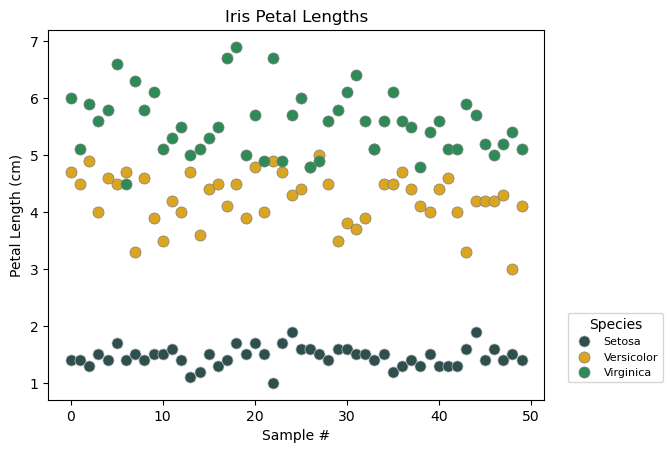

In [8]:
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set title and axes labels
axs.set_title("Iris Petal Lengths")
axs.set_xlabel("Sample #")
axs.set_ylabel("Petal Length (cm)")

# Create the plot 
axs.plot(setosa["petal_len"], "o", markersize = 8, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth=.5)
axs.plot(versicolor["petal_len"], "o", markersize = 8,  label = "Versicolor", color = "goldenrod", markeredgecolor = "grey", markeredgewidth = .5)
axs.plot(virginica["petal_len"], "o", markersize = 8, label = "Virginica", color = "seagreen", markeredgecolor = "grey", markeredgewidth=.5)
axs.legend(title = "Species", fontsize = 8, bbox_to_anchor=(1.25, .25), loc="upper right")

# Show 
plt.show()

First, a single <b>subplot</b> is specified by passing in the arguments for <span class="num">1 row and 1 column</span>. The resulting <i>Figure and Axes</i> objects are returned as <b><i>fig</i></b> and <b><i>axs</i></b>. Since there is only one subplot, it can be accessed directly by using the <b><i>axs</i></b> variable. The subplot's title and x and y labels are then set. 

Each species <i>petal length</i> is added to the subplot by accessing the Axes <b>plot</b> method. The <b><i>style</i></b> of the marker is specified as circle using <span class="str">"o"</span> and the size of the marker set using <b><i>markersize</i></b>. The color of the marker is set using <b><i>color</i></b> and the edge color and edge width of the marker set using <b><i>markeredgecolor</i></b> and <b><i>markeredgewidth</i></b> respectively. 

The <b><i>label</i></b> argument, which will be displayed in the legend, is set to the species name. A legend is created using the Axes <b>legend</b> method. It is given a <b><i>title</i></b> and the size of the font used within the legend specififed with <b><i>fontsize</i></b>. The <b><i>location</i></b> of the legend is set to the <span class="str">upper right</span> corner of the Axes. The exact placement of the legend is adjusted to slightly outside the Axes by using <b><i>bbox_to_anchor</i></b> and specifying the (x,y) coordinate location as (1.25, .25) using the <b><i>Axes coordinate system </i></b>. 

<h4><b>Petal Length using Small Multiples</b></h4>

Next let's practice visualizations that use multiple subplots in a single figure with a shared axis (small multiples). The same attribute (<i>petal length</i>) will be visualized, but this time each species will have its own subplot. 

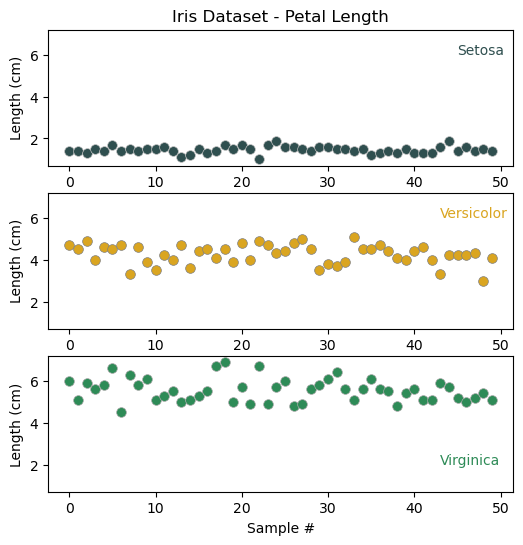

In [9]:
# Define figure and axis
fig, axs = plt.subplots(3,1, figsize = (6,6), sharey = True)

# Automate setting each subplots y-axis with a loop. 
for i in range(0, 3): 
    axs[i].set_ylabel("Length (cm)")

# Set title for axs[0] to use for all subplots 
axs[0].set_title("Iris Dataset - Petal Length")

# Set x label for bottom subplot only. 
axs[2].set_xlabel("Sample #")

# Create plot for setosa
axs[0].plot(setosa["petal_len"], "o", markersize = 7, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth = .5)
# Set species as text 
axs[0].text(45, 6, "Setosa", color = "darkslategrey") 

# Create plot for versicolor
axs[1].plot(versicolor["petal_len"], "o", markersize = 7,  label = "Versicolor", color = "goldenrod", markeredgecolor = "grey", markeredgewidth = .5)
axs[1].text(43, 6, "Versicolor", color = "goldenrod")

# Create plot for virginica
axs[2].plot(virginica["petal_len"], "o", markersize = 7, label = "Virginica", color = "seagreen", markeredgecolor = "darkgrey", markeredgewidth =.5)
axs[2].text(43, 2, "Virginica", color = "seagreen")

# Show plot
plt.show()

A subplot is created containing <span class="num">3 rows and 1 column</span>. The size of the Figure is set to <span class="num">6x6 in.</span> which allows the subplots to be displayed clearly. The y-axis, which displays the <i>petal length</i> is shared between all subplots by specifying <b><i>sharey</i></b> as <span class="bltn">True</span>. For this set of subplots, <span class="num">three</span> seperate Axes are returned. This means that to acccess a particular Axes, it needs to be specified by accessing its corresponding index in <b><i>axs</i></b>. 

Each iris species' <i>petal length</i> is plotted in its own subplot by specifying the index of the Axes and using the <b>plot</b> method. The species name is displayed on each subplot using the Axes <b>text</b> method. <i>Notice that the x,y coordinates are very different from the ones appearing in the single subplot above!</i> This is because the coordinates for <b>text</b> are specified using <b><i>data coordinate system</i></b>. 

<h4><u>Petal Length and Width</u></h4>

Let's combine the single subplot concept in which one attribute is shown on a single subplot, with the subplot concept to display petal length and petal width. 

Two vertically stacked subplots will be created. One will display <i>petal length</i> for the three species and the other will display <i>petal width</i>. 

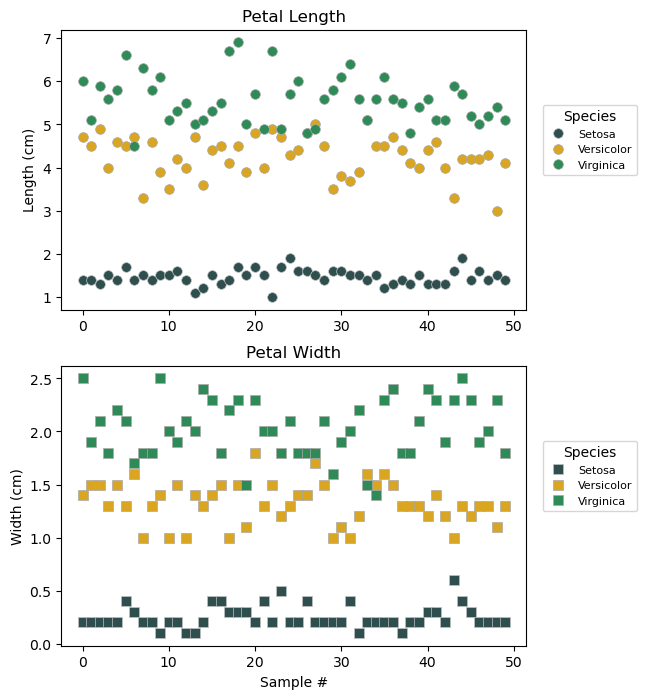

In [10]:
# Define figure and axis
fig, axs = plt.subplots(2,1, figsize = (6,8))

# Create subplot for petal length 
axs[0].set_title("Petal Length")
axs[0].set_ylabel("Length (cm)")
axs[0].plot(setosa["petal_len"], "o", markersize = 7, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth = .5)
axs[0].plot(versicolor["petal_len"], "o", markersize = 7,  label = "Versicolor", color = "goldenrod", markeredgecolor = "darkgrey", markeredgewidth = .5)
axs[0].plot(virginica["petal_len"], "o", markersize = 7, label = "Virginica", color = "seagreen", markeredgecolor = "darkgrey", markeredgewidth= .5)
axs[0].legend(title = "Species", fontsize = 8, bbox_to_anchor=(1.25,.75), loc="upper right")

# Create subplot for petal width 
axs[1].set_title("Petal Width")
axs[1].set_xlabel("Sample #")
axs[1].set_ylabel("Width (cm)")

# Plot data
axs[1].plot(setosa["petal_w"], "s", markersize = 7, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth = .5)
axs[1].plot(versicolor["petal_w"], "s", markersize = 7,  label = "Versicolor", color = "goldenrod", markeredgecolor = "darkgrey", markeredgewidth = .5)
axs[1].plot(virginica["petal_w"], "s", markersize = 7, label = "Virginica", color = "seagreen", markeredgecolor = "darkgrey", markeredgewidth= .5)
axs[1].legend(title = "Species", fontsize = 8, bbox_to_anchor=(1.25,.75), loc="upper right")

# Show 
plt.show()

The code above is very similar to the code for the previous two visualizations. The second subplot has the <b><i>style</i></b> of the marker specified as a square by using <span class="str">"s"</span>. Each subplot has its own legend. Both subplots still share the x-axis label of <span class="num">"Sample #</span>. 

<h4><b>Creating a plot with shared x-axis</b></h4>

Let's display the same data as the subplots above in a single subplot with a <b><i>shared x-axis</i></b>.

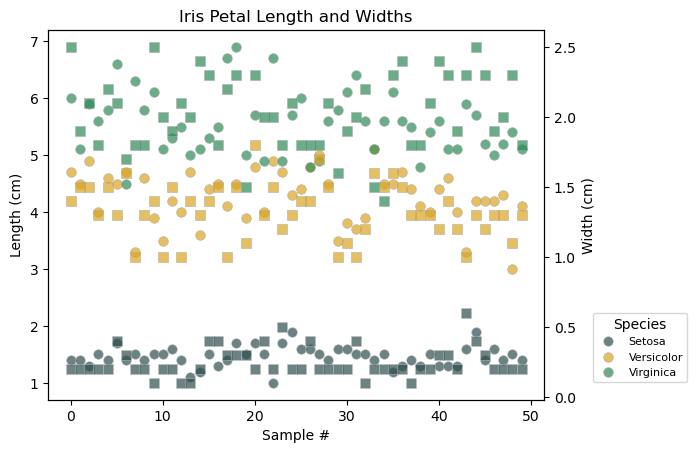

In [11]:
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Title and labels for first axes 
axs.set_title("Iris Petal Length and Widths")
axs.set_xlabel("Sample #")
axs.set_ylabel("Length (cm)")

# Plot data
axs.plot(setosa["petal_len"], "o", markersize = 7, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth = .5, alpha = .7)
axs.plot(versicolor["petal_len"], "o", markersize = 7,  label = "Versicolor", color = "goldenrod", markeredgecolor = "darkgrey", markeredgewidth = .5, alpha = .7)
axs.plot(virginica["petal_len"], "o", markersize = 7, label = "Virginica", color = "seagreen", markeredgecolor = "darkgrey", markeredgewidth= .5, alpha = .7)

# Create second axes object and its label
axs2 = axs.twinx()
axs2.set_ylabel("Width (cm)")

# Plot data specifying the created second axes object
axs2.plot(setosa["petal_w"], "s", markersize = 7, label = "Setosa", color = "darkslategrey", markeredgecolor = "silver", markeredgewidth = .5, alpha = .7)
axs2.plot(versicolor["petal_w"], "s", markersize = 7,  label = "Versicolor", color = "goldenrod", markeredgecolor = "darkgrey", markeredgewidth = .5, alpha = .7)
axs2.plot(virginica["petal_w"], "s", markersize = 7, label = "Virginica", color = "seagreen", markeredgecolor = "darkgrey", markeredgewidth= .5, alpha = .7)
axs.legend(title = "Species", fontsize = 8, bbox_to_anchor=(1.3, .25), loc="upper right")

# Show
plt.show()

The x-axis is shared for the plot by using the <b>twinx</b> method. This results in <i>petal length</i> displayed on the left y-axis and the <i>petal width</i> displayed on the right y-axis. The transparency of the markers is set using the <b><i>alpha</i></b> argument in the <b>plot</b> method. Since this plot is rather crowded, this allows markers to be seen that are positioned behind other markers. 

<h4><u>Histogram</u></h4>

Let's create a histogram for petal length for each of the three species and display it on a single Axes. The histogram code in the Code cell below is very similar to code used in previous Case Studies. 

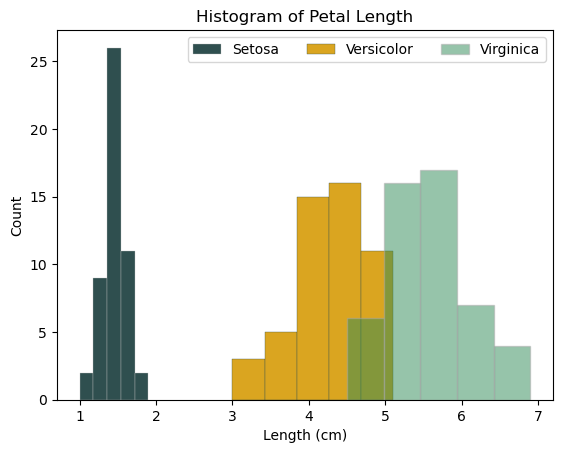

In [12]:
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set labels
axs.set_title("Histogram of Petal Length")
axs.set_xlabel("Length (cm)")
axs.set_ylabel("Count")

axs.hist(setosa["petal_len"], bins = 5, color = "darkslategrey", edgecolor = "silver", linewidth = .25, label = "Setosa")
axs.hist(versicolor["petal_len"], bins = 5, color = "goldenrod", edgecolor = "darkslategrey", linewidth = .25, label = "Versicolor")
axs.hist(virginica["petal_len"], bins = 5, color = "seagreen", edgecolor = "darkgrey", alpha = .5, label = "Virginica")

# Add Legend. Make it horizontal instead of vertical. 
axs.legend(ncol = 3)

plt.show()

The last histogram (<b><i>virginica</i></b>) in the figure is set with an <b><i>alpha</i></b> value of <span class="num">.5</span> to allow the <b><i>versicolor</i></b> histogram to be visible. The legend is formatted with a horizontal layout instead of a vertical layout, by specifying <b><i>ncols</i></b> as <span class="num">3</span>. It is also located inside the Axes, instead of outside as the previous legends were. 

<h4><b>Boxplot</b></h4>

A <b><i>boxplot</i></b> is created in the Code cell below for each <i>Iris species petal length</i>. The Code cell below is based on code from <a href = "https://matplotlib.org/2.0.2/examples/pylab_examples/boxplot_demo2.html">Matplot lib's Pylab_examples example code: boxplot_demo2.py"</a>, <a href = "https://stackoverflow.com/questions/28740234/face-pattern-for-boxes-in-boxplots">Stack Overflow's "Face pattern for boxes in boxplots"</a>, and <a href = "https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html">Matplotlib's Boxplot documentation</a>. 

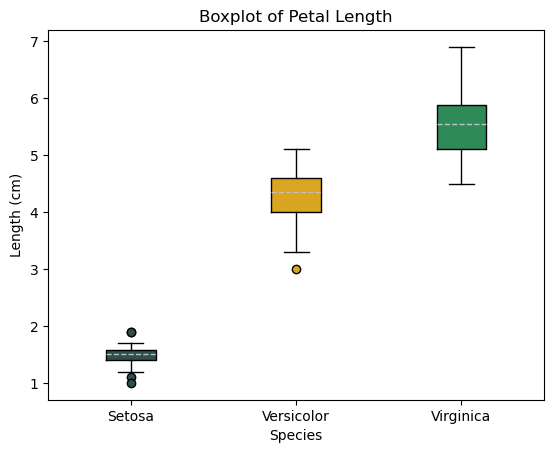

In [13]:
# Code in this cell based on: Matplotlib's "pylab_examples example code: boxplot_demo2.py" - https://matplotlib.org/2.0.2/examples/pylab_examples/boxplot_demo2.html
# StackOverflow's "Face pattern for boxes in boxplots" - https://stackoverflow.com/questions/28740234/face-pattern-for-boxes-in-boxplots
# and Matplotlib's Boxplot Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html. 
# Import Polygon 
from matplotlib.patches import Polygon 

# Define figure and axis
fig, axs = plt.subplots(1,1)

# Set labels
axs.set_title("Boxplot of Petal Length")
axs.set_xlabel("Species")
axs.set_ylabel("Length (cm)")

# Create generic boxplot
box_plots = axs.boxplot([setosa["petal_len"], versicolor["petal_len"], virginica["petal_len"]])

# List to specify colors to make each box
color_list = ["darkslategrey", "goldenrod", "seagreen"]

# For each boxplot in the figure 
for i in range(0, 3): 
    # Return the boxes for the box
    box = box_plots["boxes"][i]
        
    # Lists to hold x and y data of bounding boxes
    boxX = []
    boxY = []
    
    # Append bounding box coordinates
    for j in range(0, 5): 
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    boxCoords = list(zip(boxX, boxY))
    
    # Create polygon of specified coordinates and make it color 
    boxPolygon = Polygon(boxCoords, facecolor = color_list[i])
    axs.add_patch(boxPolygon)
    
    # Set fliers (circles) to the same color 
    plt.setp(box_plots['fliers'][i], markerfacecolor= color_list[i])
    
    # Set median line to dashed and to a color that shows 
    plt.setp(box_plots["medians"][i], linestyle = "--", linewidth = 1, color = "silver")

# Specify tick location and the label to occur at that location 
axs.set_xticks([1,2,3])
axs.set_xticklabels(["Setosa", "Versicolor", "Virginica"])

plt.show()


The <b>boxplot</b> method is passed a <span class="bltn">list</span> consisting of each DataFrame's <i>petal length</i>. The Iris species is then used as the x-axis label. First, the position of the <b><i>x-ticks</i></b> for the labels to be placed must be specified by using the <b>set_xticks</b> method. Then the labels can be added by using the <b>set_xticklabels</b> method. 

For each boxplot, a <b><i>Polygon</i></b> is created that spans the bounding box of the boxplot. This Polygon is updated to have the color used to represent each species in the other plots. The color of the outlying data points, <b><i>fliers</i></b>, is updated to match the bounding box color. Next the <b><i>median line</i></b> is updated to a silver color and set to be a dashed line. Making these modifications allows this visualization to remain consistent with the color scheme used in the previous visualizations. 

<h4><b>Petal Length versus Petal Width Scatterplot</b></h4>

Next, let's create a <b><i>scatter plot</i></b> displaying <i>petal width</i> on the x-axis and <i>petal length</i> on the y-axis. 

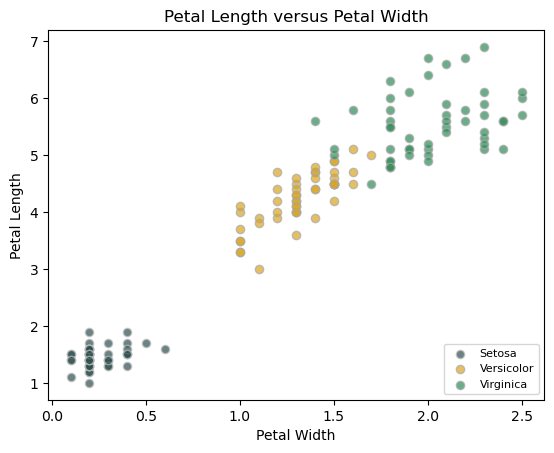

In [14]:
# Define figure and axis
fig, axs = plt.subplots(1,1)

# Title and label 
axs.set_title("Petal Length versus Petal Width")
axs.set_xlabel("Petal Width")
axs.set_ylabel("Petal Length")

# Plot data 
axs.scatter(setosa["petal_w"], setosa["petal_len"], color = "darkslategrey", edgecolor = "silver", label = "Setosa", alpha = .7)
axs.scatter(versicolor["petal_w"], versicolor["petal_len"], color = "goldenrod", edgecolor = "darkgrey" , label = "Versicolor", alpha = .7)
axs.scatter(virginica["petal_w"], virginica["petal_len"], color = "seagreen", edgecolor = "darkgrey", label = "Virginica", alpha = .7)
axs.legend(fontsize = 8, loc="lower right")

# Show 
plt.show()

The scatterplot above is very similar to the scatterplot code you've seen in previous Case Studies. The <b><i>color</i></b> and <b><i>edgecolors</i></b> are specified to follow the colors used in the rest of this Case Studys visualizations. <b><i>Alpha</i></b> is set to <span class="num">.7</span> to allow obscured markers to be more visible. The legend location <b><i>loc</i></b> is specified to the <span class="str">lower right</span> of the <b><i>Axes coordinate system</i></b>. 

<h4><b>Saving the Results</b></h4>

Let's save the scatterplot above to a <b><i>jpg</i></b> file titled <span class="str">"Petal_Length"</span>.

In [15]:
# Save figure as jpg image called Petal_Length
fig.savefig("Petal_Length.jpg")

<h3 class="yt">Your Turn</h3>

In these <span class="yt">Your Turns</span> you'll create different visualizations for the <i>sepal length</i> and <i>sepal width</i> attributes from the <b><i>Iris dataset</i></b>. Your visualizations should follow the below guidelines. 
<ul>
    <li>Each visualization should display the specified attribute for the <b><i>setosa, versicolor,</i></b> and <b><i>virginica</i></b> DataFrames.</li><br>
    <li>Choose <span class="num">three different colors</span> than the ones used in the visualizations above by using <a href = "https://matplotlib.org/stable/gallery/color/named_colors.html">Matplotlib's list of named colors</a>. Assign the selected color to an iris species and use the same color for that species in all visualizations. </li><br>
    <li> Select <span class="num">two different markers</span> than the ones used above, to represent <i>sepal length</i> and <i>sepal width</i>. <a href = "https://matplotlib.org/stable/api/markers_api.html">Matplotlib's markers</a> displays the available markers to choose from. </li><br>
    <li>All visualizations created should be labeled with or include: <b><i>title, x-axis label, y-axis label, legend</i></b>. </li>

</ul>

<h3 class="yt">Your Turn - 1</h3>

Create a plot displaying the <i>sepal length</i> for the <b><i>Iris dataset</i></b>. 

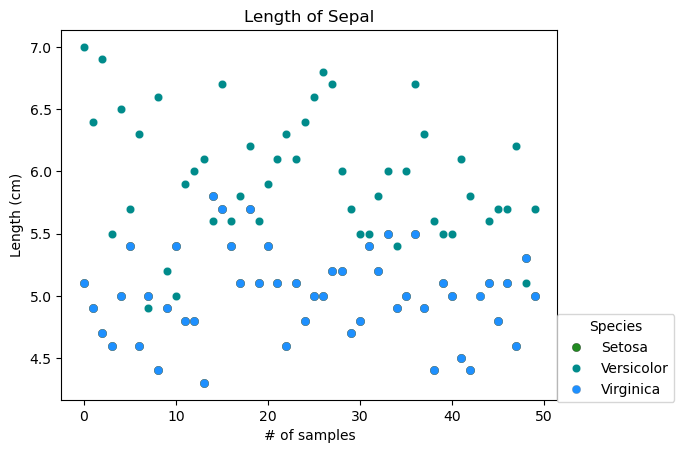

In [24]:
# Your Turn: 1 
fig, axs = plt.subplots(1,1)
axs.plot(setosa["sepal_len"],"o",markersize = 6, color = "forestgreen",label = "Setosa",markeredgecolor = "black", markeredgewidth=.2)
axs.plot(versicolor["sepal_len"],"o",markersize = 6, color = "darkcyan",label = "Versicolor",markeredgecolor = "white", markeredgewidth=.2)
axs.plot(setosa["sepal_len"],"o",markersize = 6, color = "dodgerblue",label = "Virginica",markeredgecolor = "grey", markeredgewidth=.2)
axs.set_title("Length of Sepal")
axs.set_xlabel("# of samples")
axs.set_ylabel("Length (cm)")
axs.legend(title = "Species", fontsize = 10, bbox_to_anchor=(1.25, .25), loc="upper right")



<h3 class="yt">Your Turn - 2</h3>

Create a histogram displaying the <i>sepal width</i> for the <b><i>Iris dataset</i></b>. Set the number of <b><i>bins</i></b> equal to <span class="num">5</span>. 

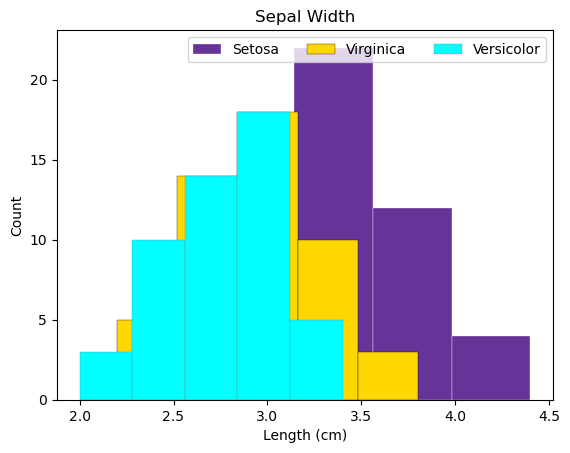

In [28]:
# Your Turn: 2 
fig, axs = plt.subplots(1,1)
axs.hist(setosa["sepal_w"], bins = 5, color = "rebeccapurple", edgecolor = "white", linewidth = .25, label = "Setosa")
axs.hist(virginica["sepal_w"], bins = 5, color = "gold", edgecolor = "black", linewidth = .25, label = "Virginica")
axs.hist(versicolor["sepal_w"], bins = 5, color = "cyan", edgecolor = "grey", linewidth = .25, label = "Versicolor")
axs.set_title("Sepal Width")
axs.set_xlabel("Length (cm)")
axs.set_ylabel("Count")
axs.legend(ncol = 3)

<h3 class="yt">Your Turn - 3</h3>

Create <span class="num"> two vertically stacked subplots </span>. Display <i>sepal length</i> for the three species in the first subplot and <i>sepal width</i> for the three species in the second subplot. 

Text(0.5, 1.0, 'Width')

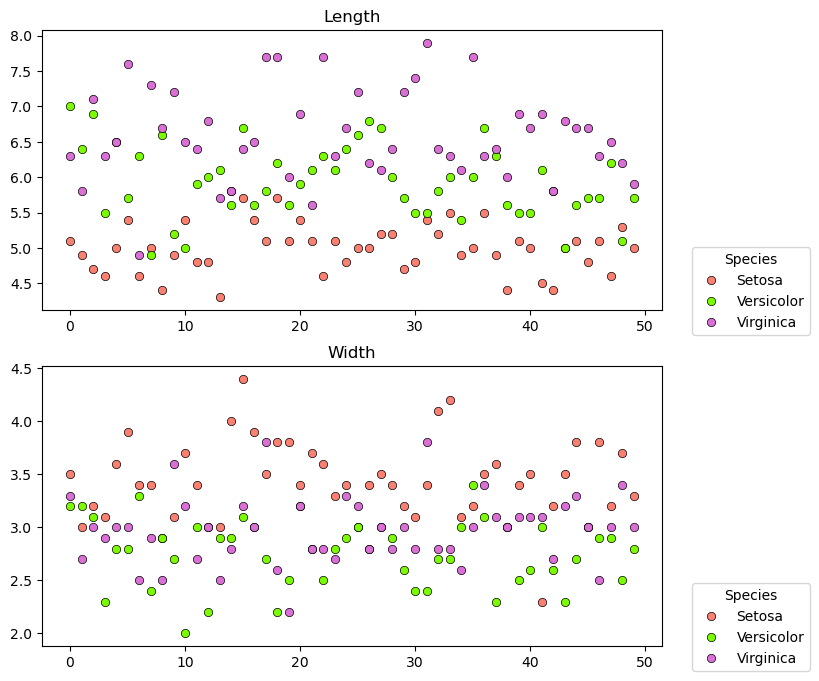

In [33]:
# Your Turn: 3
fig, axs = plt.subplots(2,1, figsize = (8,8))
axs[0].plot(setosa["sepal_len"], "o", markersize = 6, label = "Setosa", color = "salmon", markeredgecolor = "black", markeredgewidth=.5)
axs[0].plot(versicolor["sepal_len"], "o", markersize = 6,  label = "Versicolor", color = "lawngreen", markeredgecolor = "black", markeredgewidth = .5)
axs[0].plot(virginica["sepal_len"], "o", markersize = 6, label = "Virginica", color = "orchid", markeredgecolor = "black", markeredgewidth=.5)
axs[0].legend(title = "Species", fontsize = 10, bbox_to_anchor=(1.25, .25), loc="upper right")
axs[1].plot(setosa["sepal_w"], "o", markersize = 6, label = "Setosa", color = "salmon", markeredgecolor = "black", markeredgewidth=.5)
axs[1].plot(versicolor["sepal_w"], "o", markersize = 6,  label = "Versicolor", color = "lawngreen", markeredgecolor = "black", markeredgewidth = .5)
axs[1].plot(virginica["sepal_w"], "o", markersize = 6, label = "Virginica", color = "orchid", markeredgecolor = "black", markeredgewidth=.5)
axs[1].legend(title = "Species", fontsize = 10, bbox_to_anchor=(1.25, .25), loc="upper right")
axs[0].set_title("Length")
axs[1].set_title("Width")

<h3 class="yt">Your Turn - 4</h3>

Create a <b><i>scatterplot</i></b> for each Iris species based on the following specifications. 
<ol>
    <li>Scatterplots should be aligned horizontally to each other. <b><i>Hint:</i></b> set the number of subplot rows to <span class="num">1</span> and the number of subpot columns to <span class="num">3</span>. Adjust the figure size (<b><i>figsize</i></b>) as needed to avoid the subplots looking crowded. </li><br>
    <li>Set a figure title by using <b><i>fig.suptitle(t = "", x = , y =, fontsize = )</i></b>. Specify the <b><i>scatter plot title</i></b> as the first argument <b><i>t</i></b>. Adjust the position of the title to over the middle scatterplot Axes by specifying the <b><i>x</i></b> and <b><i>y coordinate</i></b>. The font size can also be adjusted as needed by using <b><i>fontsize</i></b>. </li><br>
    <li>Label each subplot with the species name. Make the text italic by specifying <b><i>fontstyle = "italic"</i></b> in the Axe's <b>set_title</b> method. </li><br>
    <li>Set the <b><i>y-axis label</i></b> for the left-most scatterplot Axes only. Set the <b><i>x-axis label</i></b> for the middle scatterplot Axes only</li><br>
    <li>Plot <i>sepal width</i> on the x-axis and <i>sepal length</i> on the y-axis. </li>
        
        
</ol>

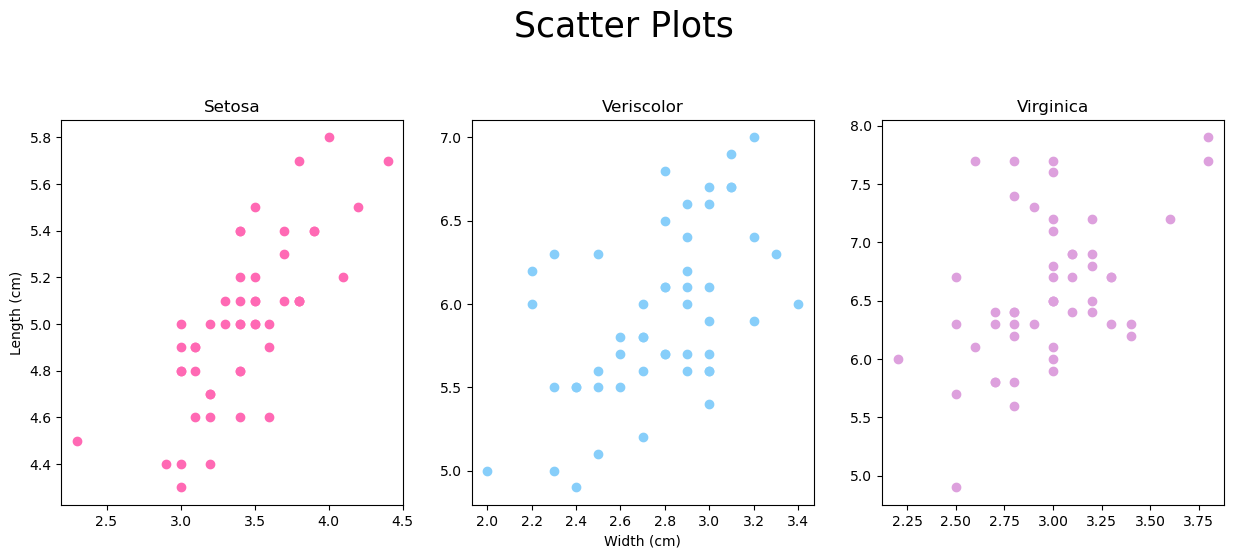

In [37]:
# Your Turn: 4
fig, axs = plt.subplots(1,3, figsize = (15,5))
fig.suptitle(t = "Scatter Plots", fontsize = 25, y = 1.1)
axs[0].set_title("Setosa", fontstyle = "normal")
axs[1].set_title("Veriscolor", fontstyle = "normal")
axs[2].set_title("Virginica", fontstyle = "normal")
axs[0].set_ylabel("Length (cm)")
axs[1].set_xlabel("Width (cm)")
axs[0].scatter(x = setosa["sepal_w"], y = setosa["sepal_len"], color = "hotpink")
axs[1].scatter(x = versicolor["sepal_w"], y = versicolor["sepal_len"], color = "lightskyblue")
axs[2].scatter(x = virginica["sepal_w"], y = virginica["sepal_len"], color = "plum")

plt.show()